In [243]:
#-------------------- pip install torchvision-------------------------

# in this example we going to develop a classifier using torch python library and 
# writing the complete rutine (architecture, pre-processing, processing, validation and prediction) from the scratch
#lets start then importung principal librearies:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

# now lets import our dataset tis dataset comes from AWS
from torchvision import datasets
from torchvision.transforms import ToTensor

usando cpu


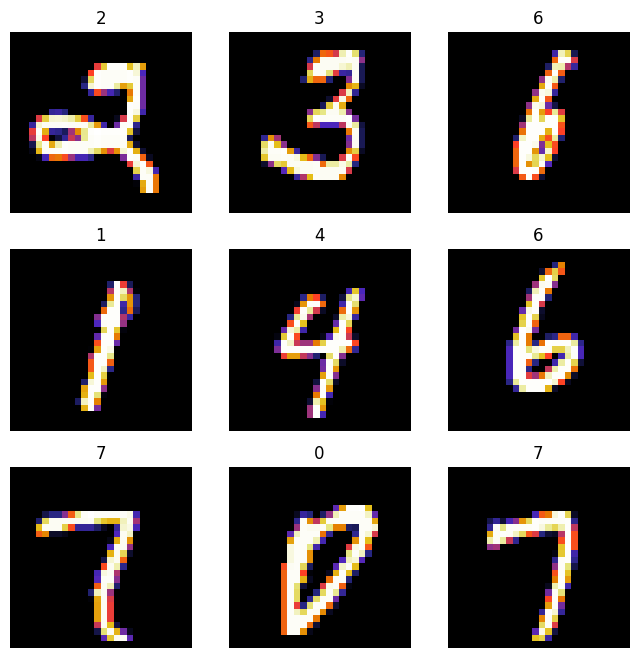

training set: 48000
training val: 6000
training test: 6000


In [244]:
# generate the new directory for datasets
data_mnist=datasets.MNIST(
    root= 'datos', # where root is the root directry on which where we are
    train= True, 
    download= True, 
    transform= ToTensor()
)
#now we have our 60k data items available and transformed to tensors using ToTensor
#have GPU?
device=(
    'cuda' if torch.cuda.is_available()
    else 'cpu'
)
print(f'usando {device}')
# in this case "device" is the CUDA variable for GPU when is available, but 
# for now we'll working using CPU only

rows, cols = 3, 3
#Lets see our data content:
figure=plt.figure(figsize=(8,8))
for i in range(1, cols*rows +1):
    sample_id=torch.randint(len(data_mnist), size=(1,)).item()
    img, lebel= data_mnist[sample_id]
    figure.add_subplot(rows, cols, i)
    plt.title(str(lebel))
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='CMRmap')
plt.show()

#training, validation and test datasets (80%, 10%, 10%): we need to create 3 partitions over the actual dataset to achive our goals. To do so...
torch.manual_seed(123) #lets take the randomness control
#now we can recreate the model independently of the running times.

train, val, test=torch.utils.data.random_split(
    data_mnist, [0.8 ,0.1, 0.1]
)
print(f'training set: {len(train)}')
print(f'training val: {len(val)}')
print(f'training test: {len(test)}')

In [265]:
#----------------------architecture of our neural Network!!---------------------------------------
#as any NN doesn't accept any type of images. a nn accept vectores only, 
# then the first vector it's ging to have 28X28 elements i.e. 784 elements (flaten)
#hide layer Nlayer + RELU (15 nodes) last layer 10 nodes softmax
#In pytorch includ int transformers, we use nn module

#A N Y 
# neural network architecture is actually a sublass/class of nn.Module
#alwais have to add 2 METHODES to this new C L A S S : 

# 1.- init methode (it defines the actual architecture of the neural network)
# 2.- "forward methode" (tells us how each predition will be generated)

# import torch.nn as nn
#create Methode INIT by using def in Class definition
import torch
import torch.nn as nn

class neuralnet(nn.Module):
    def __init__(self):
        super(neuralnet, self).__init__()
        
        # Aplanar la imagen de entrada de 28x28 a un vector de 784 elementos
        self.flatit = nn.Flatten()
        
        # Definir las capas de la red neuronal
        self.net = nn.Sequential(
            nn.Linear(28*28, 50),
            nn.ReLU(),
            nn.Linear(50, 10),
            nn.Softmax(dim=1)  # Softmax en la dimensión de las clases
        )

    def forward(self, x):
        # Procesar la entrada a través de la red
        x = self.flatit(x)
        logits = self.net(x)
        return logits

# Crear una instancia de la red neuronal
model = neuralnet().to(device)
print(model)

# Calcular el número de parámetros en la red neuronal
t = sum(p.numel() for p in model.parameters())
print(f'The number of parameters in the neural network architecture is {t}')


neuralnet(
  (flatit): Flatten(start_dim=1, end_dim=-1)
  (net): Sequential(
    (0): Linear(in_features=784, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=10, bias=True)
    (3): Softmax(dim=1)
  )
)
The number of parameters in the neural network architecture is 39760


<class 'torch.Tensor'>
<class 'int'>
we procced to transform int type into tensor to be properly processed by te network...
now our lbl is a <class 'torch.Tensor'>
tensor([[0.0882, 0.0946, 0.1077, 0.0941, 0.1117, 0.1264, 0.0906, 0.0994, 0.0972,
         0.0901]], grad_fn=<SoftmaxBackward0>)
logits:tensor([[0.0882, 0.0946, 0.1077, 0.0941, 0.1117, 0.1264, 0.0906, 0.0994, 0.0972,
         0.0901]], grad_fn=<SoftmaxBackward0>)
predicted category: 5
actual category: 5


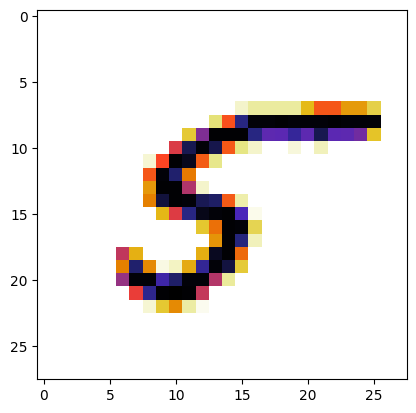

In [270]:
#forward propagation:
# is the frst predition we gonna have and its not going to be really good itis like this because we need additional tools like back propagation and the gradiant descending/ce
img, lbl=train[201]
print(type(img))
print(type(lbl))
print('we procced to transform int type into tensor to be properly processed by te network...')
lbl=torch.tensor(lbl).reshape(1)
print(f'now our lbl is a {type(lbl)}')

img, lbl = img.to(device), lbl.to(device)
logits=model(img)
print(logits)

y_predict=logits.argmax(1)
# ypredict
plt.imshow(img.cpu().squeeze(), cmap='CMRmap_r');
print(f'logits:{logits}')
print(f'predicted category: {y_predict[0]}')
print(f'actual category: {lbl[0]}')

In [271]:
#Back propagation:
fn_loss=nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(model.parameters(), lr=0.3) #gradient descending, learning rate of 30%
loss=fn_loss(logits, lbl)
print(loss)
#now lets calculate de gradients of the loss i.e (calculate the change of the loss regarding to model parameters)
loss.backward()
optimizer.step()
optimizer.zero_grad()

tensor(2.2762, grad_fn=<NllLossBackward0>)


In [275]:
from torch.utils.data import DataLoader
batchsize=500

train_loader=DataLoader(
    dataset=train, 
    batch_size=batchsize, 
    shuffle=True
)

val_loader=DataLoader(
    dataset=val,
    batch_size=batchsize,
    shuffle=False
)

In [273]:
# #training yn validation of the model
# #lets take our forward and back propagation and set it in a loop for to iterate it
# #hiperparameters...
# learning_rate=0.1
# epochs=15 #"the epoch the number of time we want to execute forward-backward"
# #lets build our loss function
# fn_loss=nn.CrossEntropyLoss()
# optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

In [276]:
# Training and validation of the model
# Let's take our forward and backward propagation and set it in a loop to iterate it
# Hyperparameters...
learning_rate = 0.1
epochs = 15  # "The epoch is the number of times we want to execute forward-backward"
# Let's build our loss function
fn_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# The best practice is to generate two principal functions: one to train and one more for the validation then set them into the 10 for loop
def train_loop(dataloader, model, loss_fn, optimizer):
    train_size = len(dataloader.dataset)
    nbatches = len(dataloader)

    model.train()

    loss_accum, accuracy_accum = 0, 0

    for nbatch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        logits = model(X)
        loss = loss_fn(logits, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        loss_accum += loss.item()
        accuracy_accum += (logits.argmax(1) == y).type(torch.float).sum().item()
        
        if nbatch % 10 == 0:
            ndata = nbatch * len(X)
            print(f'\tLoss: {loss.item():>7f} [{ndata:>5d}/{train_size:>5d}]')

    loss_train = loss_accum / nbatches
    accuracy_train = accuracy_accum / train_size
    print(f'Accuracy/Loss (average)')
    print(f'\t\tAccuracy: {(100 * accuracy_train):>0.1f}% | Loss: {loss_train:>8f}')

def validate_loop(dataloader, model, loss_fn):
    val_size = len(dataloader.dataset)
    nbatches = len(dataloader)

    model.eval()

    loss_accum, accuracy_accum = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            logits = model(X)
            loss = loss_fn(logits, y)

            loss_accum += loss.item()
            accuracy_accum += (logits.argmax(1) == y).type(torch.float).sum().item()

    loss_val = loss_accum / nbatches
    accuracy_val = accuracy_accum / val_size
    print(f'Validation Accuracy/Loss (average)')
    print(f'\t\tAccuracy: {(100 * accuracy_val):>0.1f}% | Loss: {loss_val:>8f}')

# Main training loop
for epoch in range(epochs):
    print(f'Epoch {epoch+1}\n-------------------------------')
    train_loop(train_loader, model, fn_loss, optimizer)
    validate_loop(val_loader, model, fn_loss)
print('Training and validation completed!')


Epoch 1
-------------------------------
	Loss: 1.708395 [    0/48000]
	Loss: 1.716877 [ 5000/48000]
	Loss: 1.695567 [10000/48000]
	Loss: 1.695331 [15000/48000]
	Loss: 1.694444 [20000/48000]
	Loss: 1.710031 [25000/48000]
	Loss: 1.710716 [30000/48000]
	Loss: 1.662679 [35000/48000]
	Loss: 1.675488 [40000/48000]
	Loss: 1.696534 [45000/48000]
Accuracy/Loss (average)
		Accuracy: 80.7% | Loss: 1.695058
Validation Accuracy/Loss (average)
		Accuracy: 80.0% | Loss: 1.697580
Epoch 2
-------------------------------
	Loss: 1.683122 [    0/48000]
	Loss: 1.682792 [ 5000/48000]
	Loss: 1.685802 [10000/48000]
	Loss: 1.695770 [15000/48000]
	Loss: 1.708096 [20000/48000]
	Loss: 1.680927 [25000/48000]
	Loss: 1.680437 [30000/48000]
	Loss: 1.681267 [35000/48000]
	Loss: 1.685398 [40000/48000]
	Loss: 1.665774 [45000/48000]
Accuracy/Loss (average)
		Accuracy: 81.1% | Loss: 1.683955
Validation Accuracy/Loss (average)
		Accuracy: 80.4% | Loss: 1.688694
Epoch 3
-------------------------------
	Loss: 1.672865 [    0